In [81]:
# Libraries set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier




In [3]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
variables_df = pd.read_csv('VariableDefinitions.csv')
samplesub_df = pd.read_csv('SampleSubmission.csv')
extradata_df = pd.read_csv('extra_data.csv')

In [4]:
train_df.shape

(373, 12)

In [5]:
train_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [6]:
test_df.shape

(558, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASE_VALUE,373.0,4506.522788,15722.261797,10.0,150.0,690.0,2000.0,150000.0
USER_AGE,61.0,25.803279,1.423841,25.0,25.0,25.0,27.0,32.0
USER_HOUSEHOLD,373.0,2.831099,1.600033,1.0,1.0,3.0,4.0,7.0
USER_INCOME,373.0,146235.924933,166521.780346,8000.0,23000.0,90000.0,200000.0,1000000.0


In [9]:
samplesub_df.shape

(558, 14)

In [10]:
samplesub_df.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_01db594f,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_07pm99no,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ID_09jryhkd,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ID_0ccv924c,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
extradata_df.shape

(10000, 12)

In [12]:
extradata_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm


In [13]:
extradata_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                  10000
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10000
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                  8842
USER_GENDER                                 34
USER_HOUSEHOLD                               0
USER_INCOME                                  0
USER_ID                                      0
Transaction_ID                               0
dtype: int64

In [14]:
train_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [41]:
test_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 473
USER_GENDER                                5
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [42]:
# Calculate the mode
gender_mode = train_df['USER_GENDER'].mode()[0]
train_df['USER_GENDER'] = train_df['USER_GENDER'].fillna(gender_mode)
gender_mode = test_df['USER_GENDER'].mode()[0]
test_df['USER_GENDER'] = test_df['USER_GENDER'].fillna(gender_mode)

# Calculate the median age
age_median = train_df['USER_AGE'].median()
train_df['USER_AGE'] = train_df['USER_AGE'].fillna(age_median)
age_median = test_df['USER_AGE'].median()
test_df['USER_AGE'] = test_df['USER_AGE'].fillna(age_median)



In [16]:
train_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [43]:
test_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

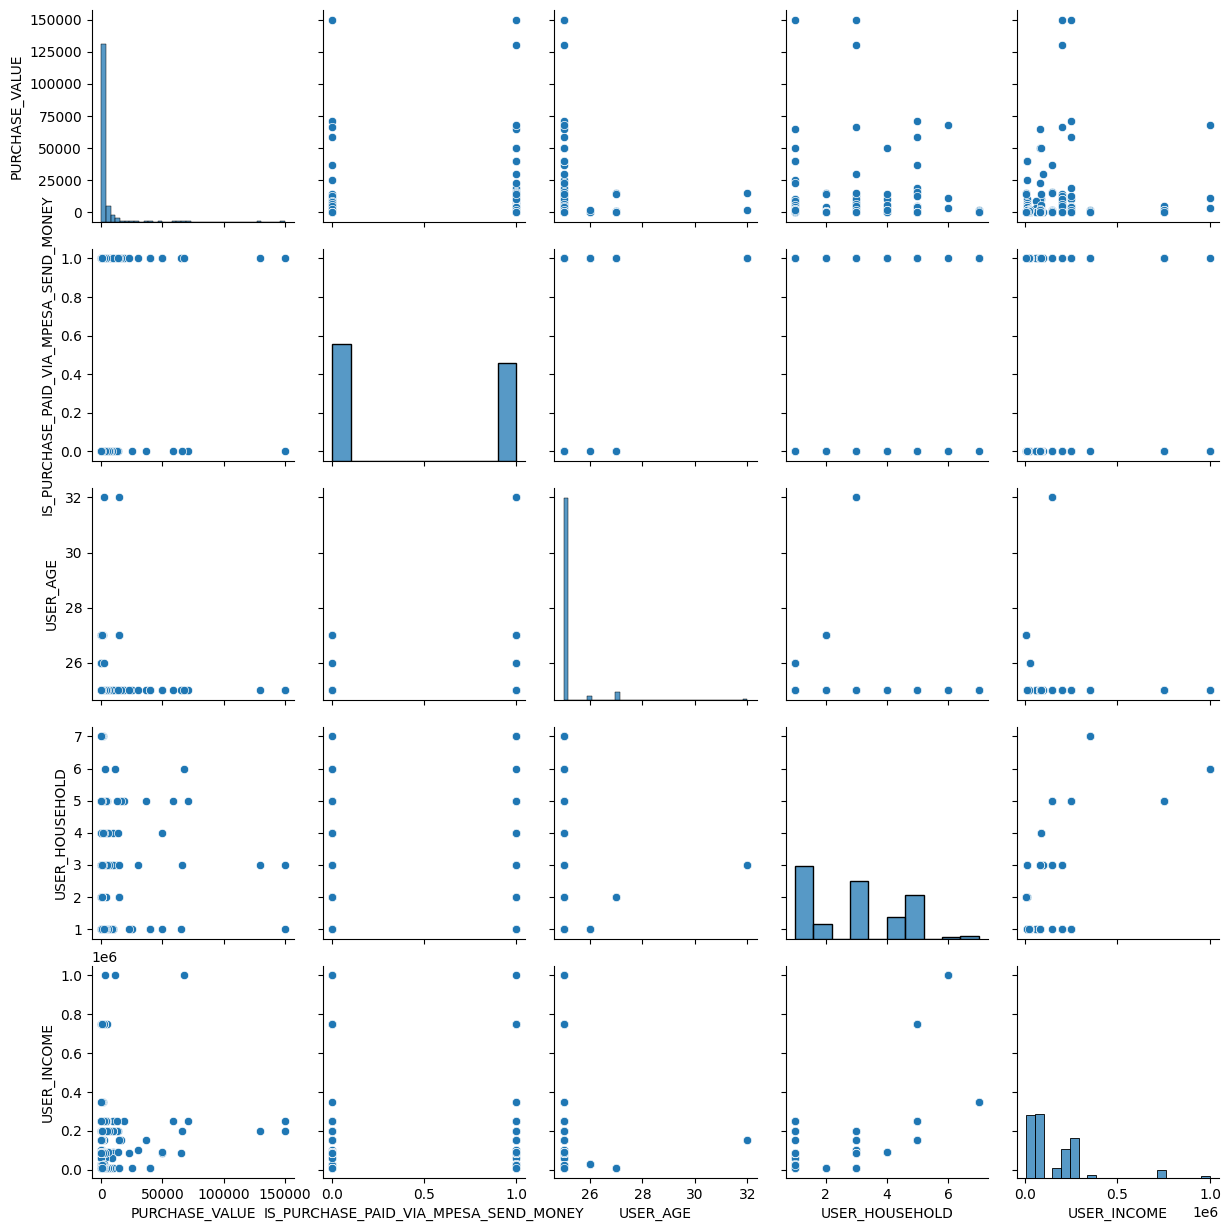

In [17]:
# pair plot
sns.pairplot(train_df)
plt.show()



Correlation Matrix:
                PURCHASE_VALUE  USER_AGE  USER_HOUSEHOLD  USER_INCOME
PURCHASE_VALUE        1.000000 -0.007033        0.011000     0.106300
USER_AGE             -0.007033  1.000000       -0.087899    -0.115993
USER_HOUSEHOLD        0.011000 -0.087899        1.000000     0.523175
USER_INCOME           0.106300 -0.115993        0.523175     1.000000


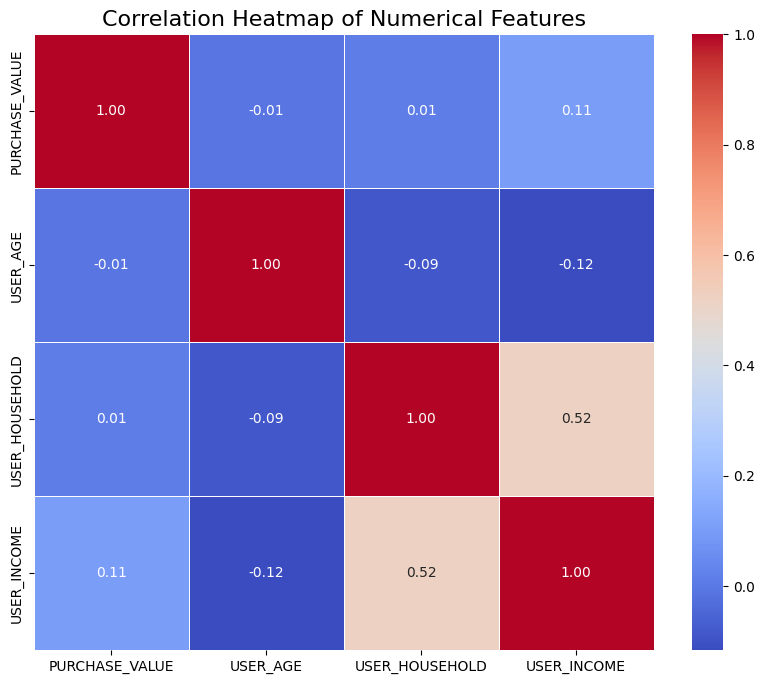

In [18]:


# Numerical columns for the correlation matrix
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']
numerical_df = train_df[numerical_features]

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap='coolwarm',     
    fmt=".2f",           
    linewidths=.5        
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

### Correlation Heatmap Insights

1. Moderate Positive Correlation 

   * The strongest link is between **`USER_HOUSEHOLD`** and **`USER_INCOME`** (**r = +0.52**).
   * This indicates that users with **larger households tend to have higher incomes**, which aligns with real-world expectations (e.g., multiple earners or higher earners supporting larger families).

2. Weak or Negligible Correlations 

   * All other relationships are **very weak** (ranging from **–0.12 to +0.11**).
   * For instance:

     * **`USER_INCOME` ↔ `PURCHASE_VALUE` = +0.11**, suggesting income doesn’t strongly influence single purchase size.
     * **`USER_AGE` ↔ `USER_INCOME` = –0.12**, showing no meaningful relationship.
   * This confirms that most numerical features are **independent** and not linearly related.

3. Modeling Implications

   * **No multicollinearity risk:** None of the features are highly correlated (≥ 0.8), so all can be safely retained.
   * **Prefer non-linear models:** The absence of linear relationships means **tree-based or ensemble models** (e.g., XGBoost, Random Forest, CatBoost) will capture patterns more effectively than linear regression.
   * **Categorical features matter:** Predictive strength will likely come from **non-numerical data**, such as `MERCHANT_NAME`.



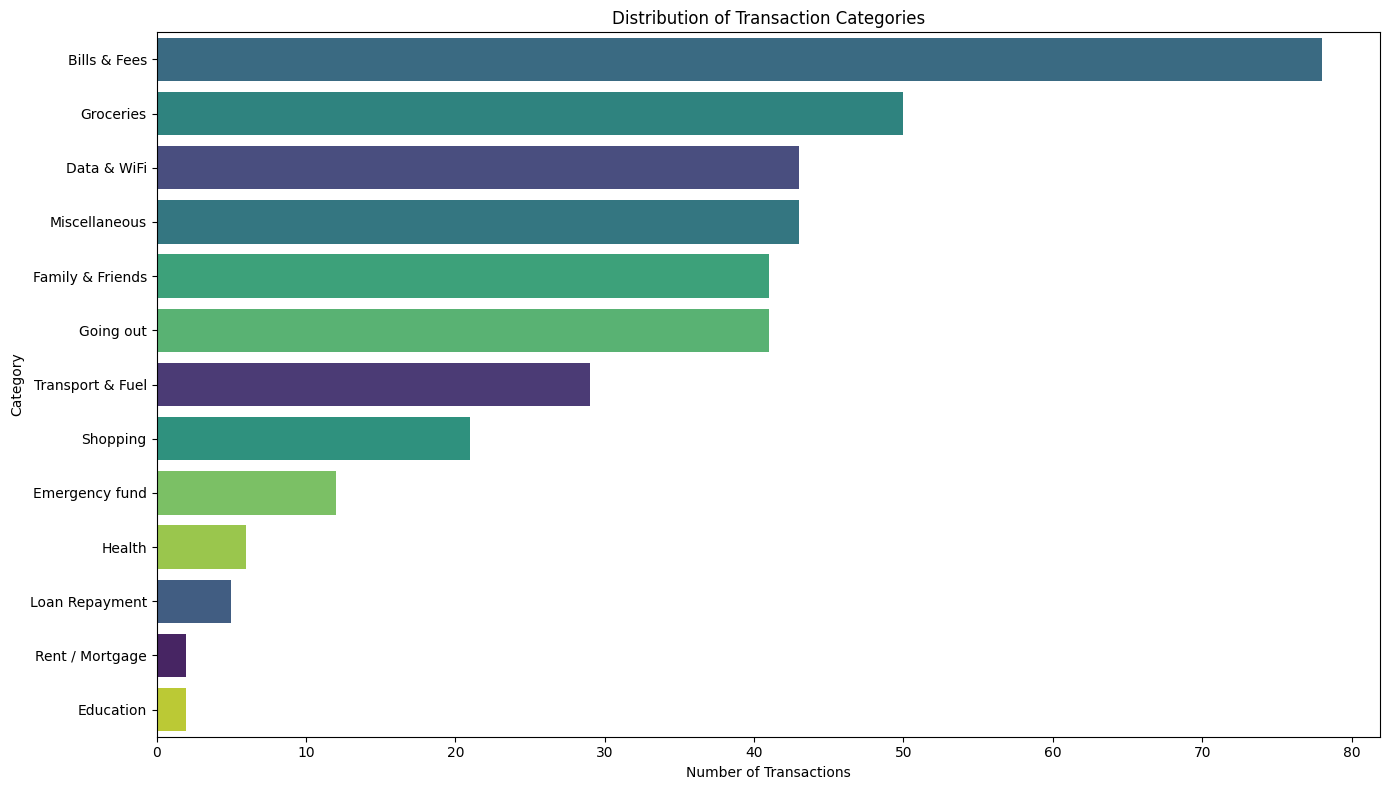

In [19]:
plt.figure(figsize=(14, 8))
sns.countplot(
    y=train_df['MERCHANT_CATEGORIZED_AS'],
    order=train_df['MERCHANT_CATEGORIZED_AS'].value_counts().index,
    hue=train_df['MERCHANT_CATEGORIZED_AS'], 
    palette='viridis',
    legend=False 
)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.tight_layout()
# plt.savefig('target_variable_distribution.png')
# print("Saved plot:target_variable_distribution.png")
plt.show()


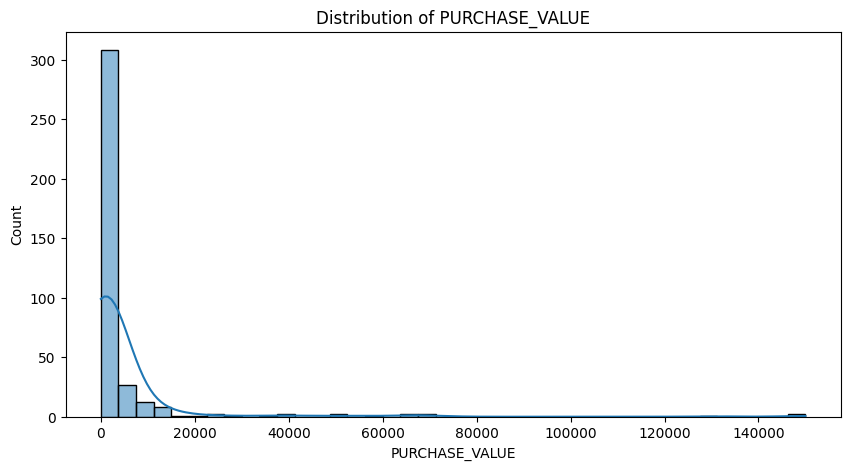

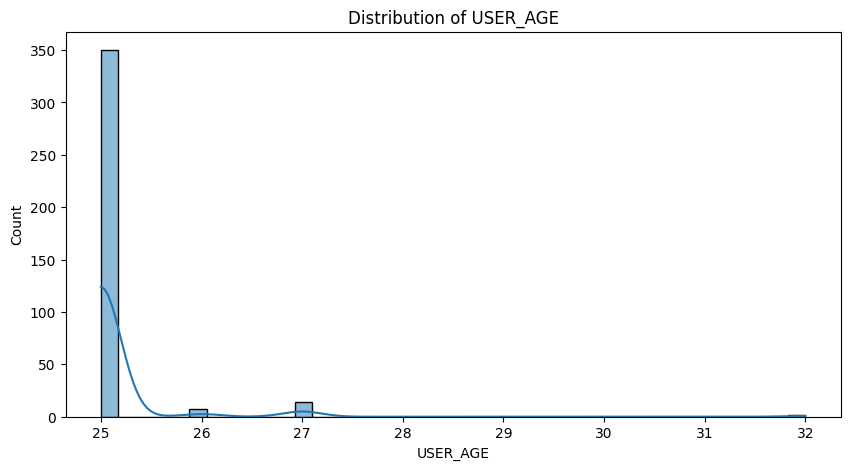

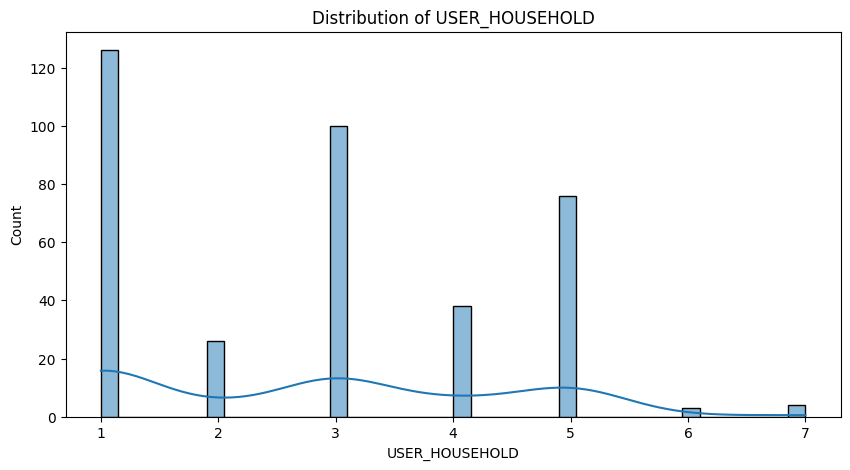

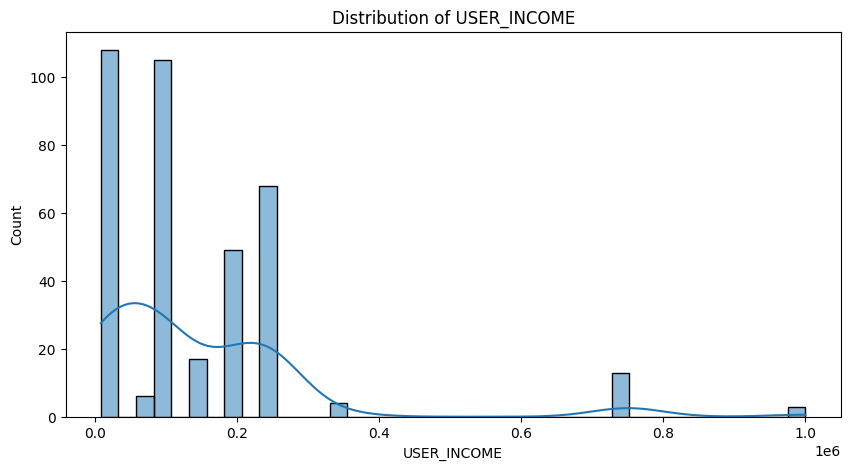

In [20]:
# Numerical Features
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_df[col].dropna(), kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    # plt.savefig(f'distribution_{col}.png')
    # print(f"Saved plot: distribution_{col}.png")
    plt.show()

### Summary of Numerical Feature Distributions

1. `PURCHASE_VALUE` – Highly Right-Skewed 

   * **Observation:** Most purchases are small, with a few very large transactions creating a long right tail.
   * **Insight:** Indicates **extreme skewness** driven by outliers.
   * **Recommendation:** Apply a **logarithmic transformation (`np.log1p()`)** to normalize the distribution and improve model performance.


2. `USER_AGE` – Artificial Peak at 25 

   * **Observation:** One dominant bar at 25 years, caused by imputation using the median.
   * **Insight:** The feature now has **low variance** and limited predictive power.
   * **Recommendation:** Acceptable for data completeness, but treat with **caution in modeling** or consider **feature scaling or binning** to reduce distortion.


3. `USER_HOUSEHOLD` – Discrete and Balanced

   * **Observation:** Clear bars at integer values (1–6), peaking around 3–4 members.
   * **Insight:** Expected **discrete distribution** with no major skew.
   * **Recommendation:** Feature is **well-behaved** — no transformation needed.


4. `USER_INCOME` – Strong Right Skew

   * **Observation:** Most users earn below 200,000, but a few outliers have very high income values.
   * **Insight:** Distribution mirrors typical **income inequality patterns**, heavily right-skewed.
   * **Recommendation:** Apply **log transformation** to stabilize variance and enhance model interpretability.




In [21]:
# Text Feature: MERCHANT_NAME
print("\nTop 20 Most Frequent Merchants")
print(train_df['MERCHANT_NAME'].value_counts().head(20))


Top 20 Most Frequent Merchants
MERCHANT_NAME
SAFARICOM OFFERS  TUNUKIWA    14
M-SHWARI ACCOUNT              12
SAFARICOM LIMITED             10
PETER KENDA                   10
EQUITY PAYBILL ACCOUNT         8
KPLC PREPAID                   8
CARREFOUR SRT                  7
LEAH NGOGA                     7
FATUMA OSORE                   6
SAFARICOM HOME                 6
ELIZABETH NYAMBURA             5
SAFARICOM POST PAID            5
JACKSON ANDIVA                 4
JERUSA OTIENO                  4
RAPHAEL MWANGI                 4
NHIF                           4
KAPS PARKING                   4
CEDRIC OCHOLA                  4
TELKOM KENYA LIMITED           4
PETER NJOORA KENDA             3
Name: count, dtype: int64


In [44]:
# Text Feature: MERCHANT_NAME
print("\nTop 20 Most Frequent Merchants")
print(test_df['MERCHANT_NAME'].value_counts().head(20))


Top 20 Most Frequent Merchants
MERCHANT_NAME
FATUMA OSORE                  17
PETER KENDA                   14
SAFARICOM OFFERS  TUNUKIWA    13
KPLC PREPAID                  12
KAPS PARKING                  11
EQUITY PAYBILL ACCOUNT        11
M-SHWARI ACCOUNT              10
SAFARICOM LIMITED              8
LEAH NGOGA                     8
SAFARICOM HOME                 8
QUICK MART KIAMBU              7
RAPHAEL MWANGI                 7
JACKSON ANDIVA                 7
TELKOM KENYA LIMITED           5
PETER NJOORA KENDA             5
KCB PAYBILL AC                 5
CARREFOUR SRT                  5
TEOFILO LIGAWA                 5
JERUSA A OTIENO                5
MYAIRTIME LIMITED              5
Name: count, dtype: int64


In [22]:
# Convert to datetime 
train_df['PURCHASED_AT'] = pd.to_datetime(train_df['PURCHASED_AT'])
train_df['PURCHASE_HOUR'] = train_df['PURCHASED_AT'].dt.hour
train_df['PURCHASE_DAY_OF_WEEK'] = train_df['PURCHASED_AT'].dt.day_name()

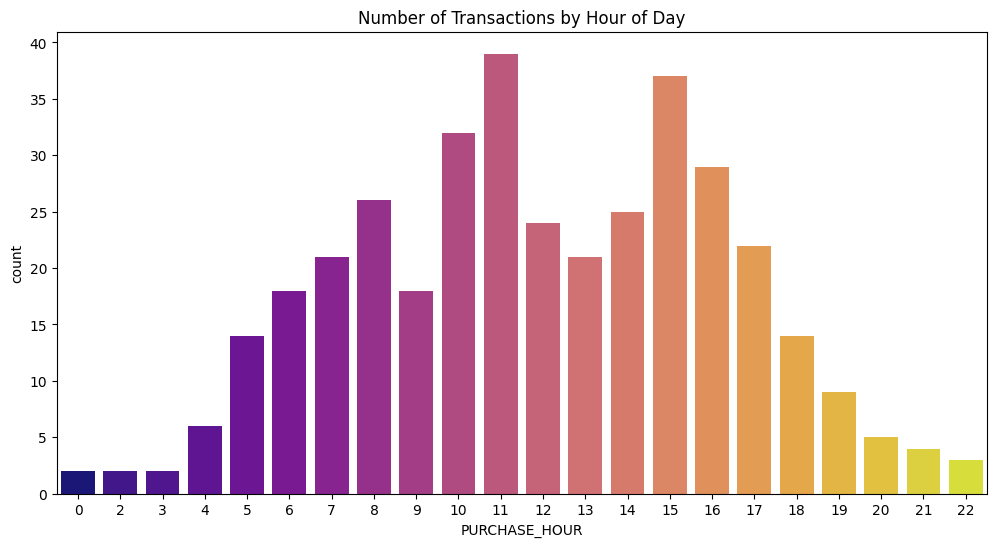

In [23]:
# Plot transactions by hour
plt.figure(figsize=(12, 6))
sns.countplot(
    x='PURCHASE_HOUR',
    data=train_df,
    hue='PURCHASE_HOUR', 
    palette='plasma',
    legend=False 
)
plt.title('Number of Transactions by Hour of Day')
# plt.savefig('transactions_by_hour.png')
# print("Saved plot: transactions_by_hour.png")
plt.show()

### Transaction Hour Distribution Insights

1. Clear Daily Spending Rhythm 

   * **Observation:** Transaction activity follows a predictable daily cycle—lowest from midnight to 5 AM, rising steadily in the morning, peaking mid-day, and tapering off in the evening.
   * **Insight:** This pattern reflects typical human behavior linked to work, commuting, meals, and social routines.


2. Distinct Peak Periods 

   * **Morning Peak (8–9 AM):** Likely driven by commuting expenses and early-day payments.
   * **Mid-day Peak (12–2 PM):** Represents the highest spending window—associated with lunch, errands, and casual purchases.
   * **Evening Activity (4–7 PM):** Reflects post-work shopping, bill payments, and social spending.
   * **Insight:** Each time band corresponds to specific lifestyle-driven transaction types.


3. Modeling Implications

   * **Predictive Value of `PURCHASE_HOUR`:** The strong time-based structure makes this one of the most informative features for your model.
   * **Behavioral Rules the Model Can Learn:**

     * Mid-day transactions → higher likelihood of “Going out.”
     * Early-morning transactions → higher likelihood of “Transport & Fuel.”
   * **Impact:** Time-based information adds behavioral depth and boosts your model’s ability to make context-aware predictions.




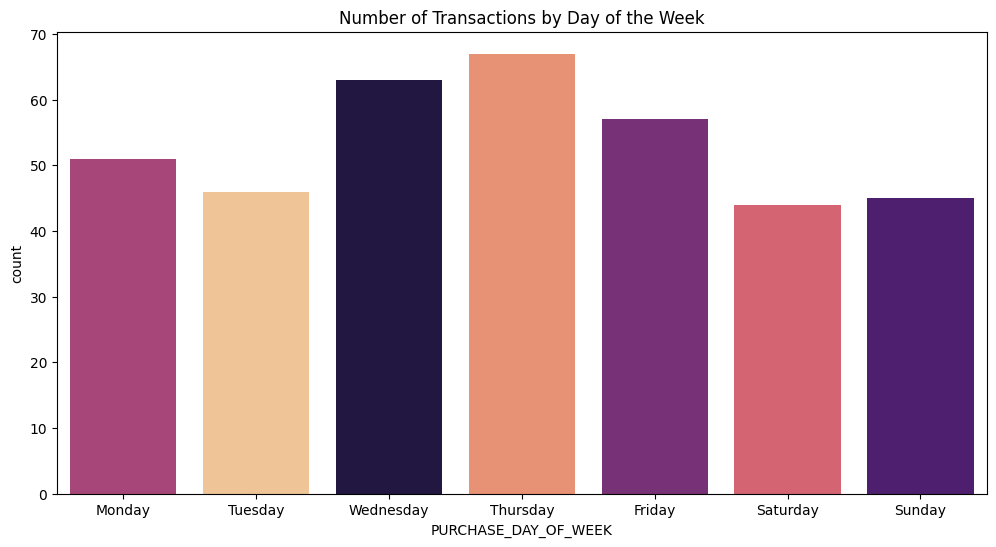

In [24]:
# Plot transactions by day of the week
plt.figure(figsize=(12, 6))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(
    x='PURCHASE_DAY_OF_WEEK',
    data=train_df,
    order=days_order,
    hue='PURCHASE_DAY_OF_WEEK', 
    palette='magma',
    legend=False 
)
plt.title('Number of Transactions by Day of the Week')
# plt.savefig('5_transactions_by_day.png')
# print("Saved plot: 5_transactions_by_day.png")
plt.show()

### Transaction Patterns by Day of the Week

1. Weekly Spending Cycle

   * **Observation:** Transaction activity follows a structured weekly rhythm — slow at the start of the week, rising mid-week, peaking on Thursday, and declining over the weekend.
   * **Insight:** This confirms that user spending behavior aligns closely with typical work and lifestyle schedules.


2. Weekend Contrast: Busy Saturday, Quiet Sunday 

   * **Observation:** Saturday shows high transaction volumes, while Sunday has the fewest.
   * **Insight:** Saturday spending reflects leisure and shopping activities, whereas Sunday’s dip indicates rest, family time, or minimal financial activity.


3. Mid-Week Peak Activity 

   * **Observation:** Thursday records the highest number of transactions.
   * **Insight:** This may stem from salary payments, bill settlements, or preparations for weekend expenses—revealing predictable financial routines.


4. Modeling Implications 

   * **Predictive Power of `PURCHASE_DAY_OF_WEEK`:** The strong weekly structure makes this a valuable feature for classification.
   * **Behavioral Learning:** The model can capture weekly patterns—for example, associating Saturday transactions with “Going out” or “Shopping” and mid-week ones with “Bills & Fees.”
   * **Impact:** Adds important **temporal context** that enhances both interpretability and model accuracy.




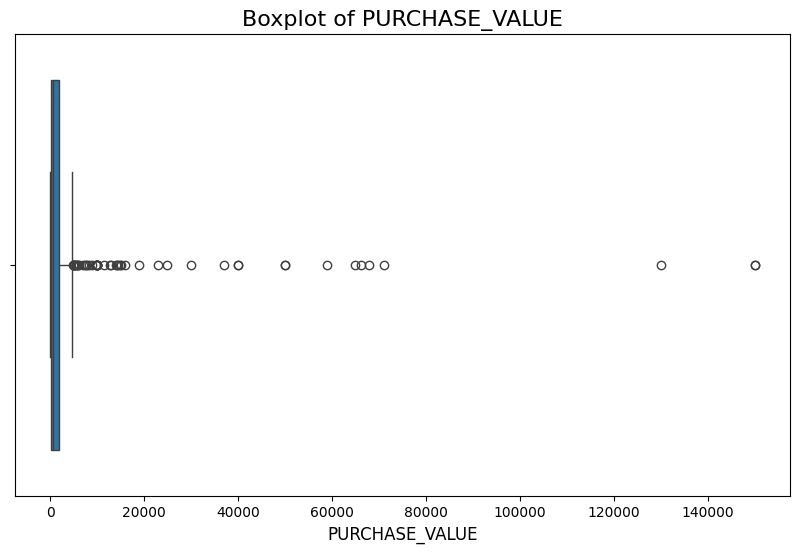

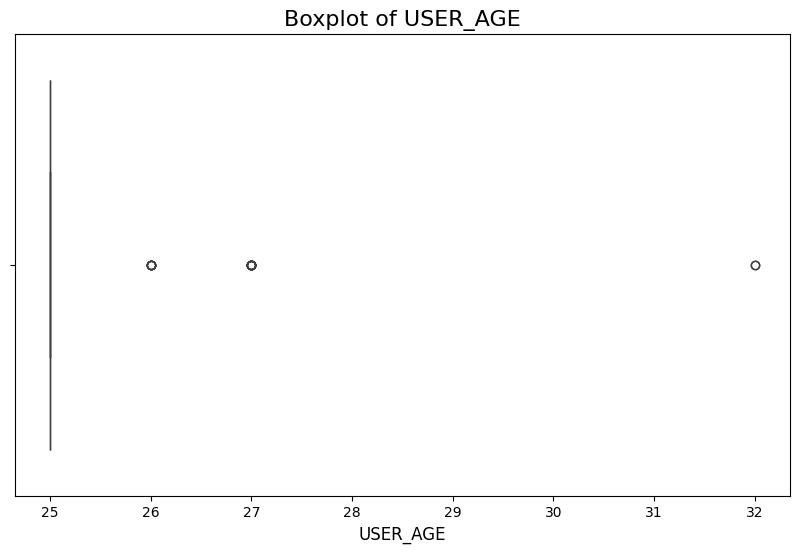

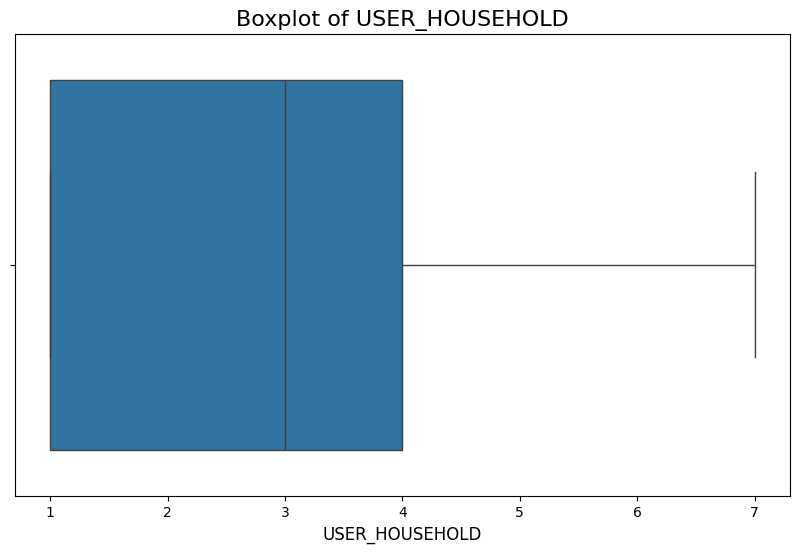

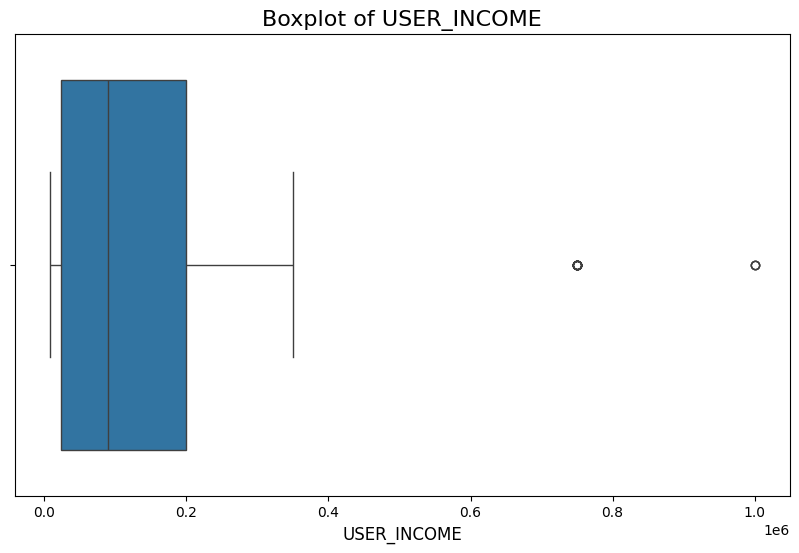

In [25]:


# numerical columns 
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']

# Loop through each numerical column and create a boxplot
for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.show()


## Boxplot Insights

1. `PURCHASE_VALUE` — Extreme Right-Skewness and Outliers 

   * **Observation:** The main box is compressed to the left, with numerous extreme outliers on the right.
   * **Insight:** Most transactions are for small amounts, but a few large purchases dominate the scale.
   * **Recommendation:** Apply a **logarithmic transformation** to normalize the distribution and make patterns clearer.


2. `USER_AGE` — Minimal Variance Due to Imputation 

   * **Observation:** The box is extremely narrow, centered at age 25.
   * **Insight:** Median imputation for missing values has eliminated most variability.
   * **Takeaway:** `USER_AGE` may have limited predictive power in its current form.


3. `USER_HOUSEHOLD` — Stable and Well-Distributed 

   * **Observation:** Median household size is 3, with most values between 1 and 4.
   * **Insight:** The feature shows a natural and interpretable spread with minor outliers.
   * **Recommendation:** Use this feature as-is; no transformation is necessary.


4. `USER_INCOME` — Strong Right-Skewness and High Outliers 

   * **Observation:** The box is flattened with long right-tail outliers.
   * **Insight:** A few users with exceptionally high incomes distort the scale.
   * **Recommendation:** Apply a **logarithmic transformation** to stabilize variance and reduce the impact of outliers.



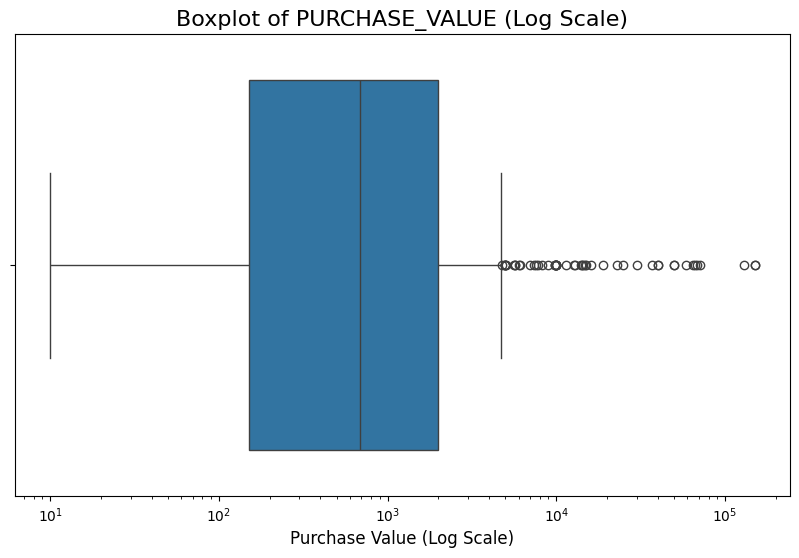

In [26]:
# PURCHASE_VALUE with Log Scale
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['PURCHASE_VALUE'])
plt.xscale('log') # Set the x-axis to a logarithmic scale
plt.title('Boxplot of PURCHASE_VALUE (Log Scale)', fontsize=16)
plt.xlabel('Purchase Value (Log Scale)', fontsize=12)
plt.show()

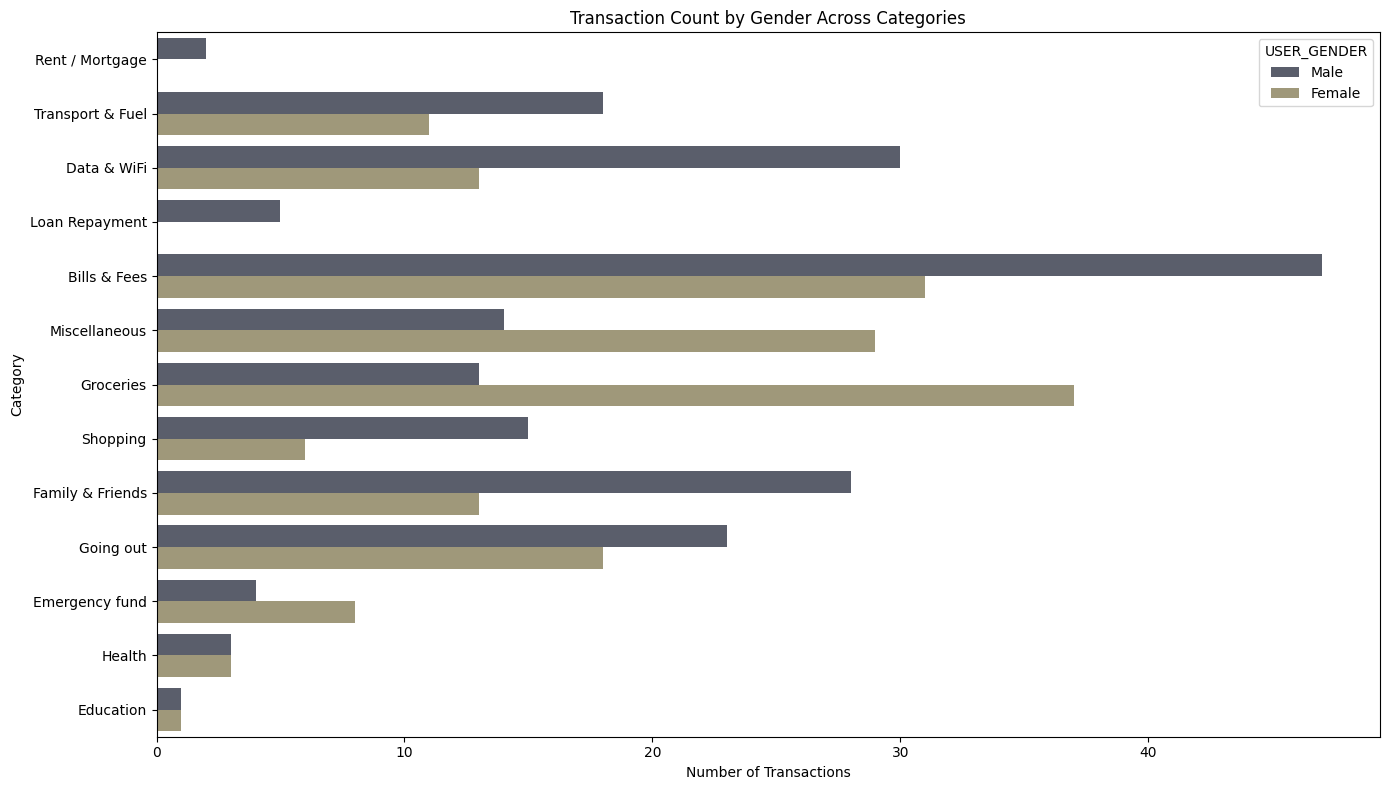

In [27]:
# Gender vs. Category
plt.figure(figsize=(14, 8))
sns.countplot(y='MERCHANT_CATEGORIZED_AS', hue='USER_GENDER', data=train_df, palette='cividis')
plt.title('Transaction Count by Gender Across Categories')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.tight_layout()
# plt.savefig('7_gender_vs_category.png')
# print("Saved plot: 7_gender_vs_category.png")
plt.show()

### Gender-Based Spending Insights

1. Male Users Dominate Transaction Activity 

   * **Observation:** Across nearly all categories, male users record noticeably more transactions than female users.
   * **Insight:** This indicates a **gender imbalance** in transaction volume — male users are the more active spenders in this dataset. This could stem from the app’s user demographics or general spending behavior differences.


2. Similar Spending Priorities Across Genders

   * **Observation:** Both genders show the same top spending categories — **`Data & WiFi`**, **`Transport & Fuel`**, and **`Groceries`**.
   * **Insight:** Gender has little influence on *what* users spend on; both focus on essential and recurring expenses. There are no categories uniquely dominated by one gender.


3. Modeling Implications 

   * **Predictive Value:** `USER_GENDER` adds **contextual nuance** but is not a major standalone predictor.
   * **Recommendation:** Retain the feature — while its direct effect is limited, it can interact meaningfully with stronger predictors (like `MERCHANT_NAME` or `PURCHASE_HOUR`) to improve overall model accuracy.




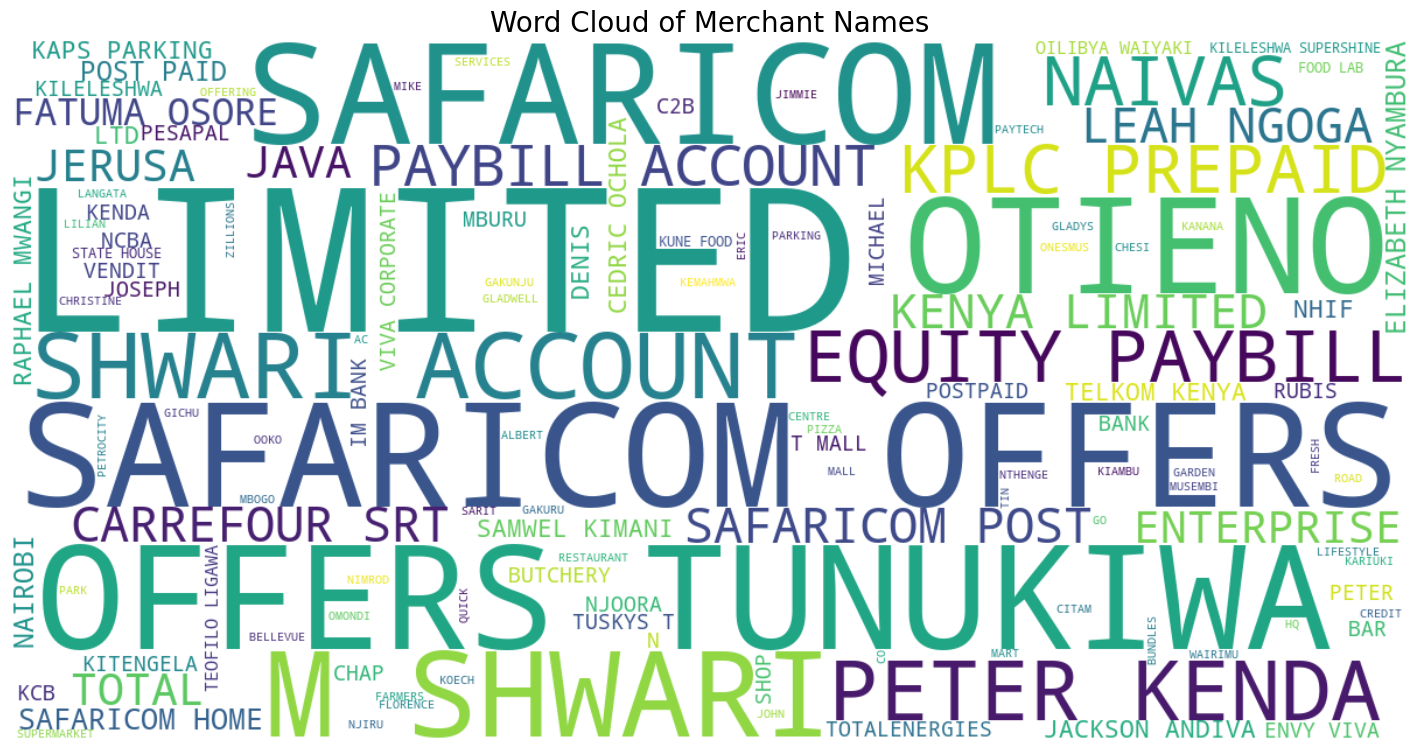

In [ ]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# handle any potential missing values first
# ensure all data is in string format.
text_data = ' '.join(train_df['MERCHANT_NAME'].dropna().astype(str))

# Create the WordCloud object
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=None, 
    min_font_size=10
).generate(text_data)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 7), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Merchant Names', fontsize=20)
plt.show()

### Telecom and Mobile Money Transactions Dominate

The most striking feature of the word cloud is the overwhelming size of the word **`SAFARICOM`**.

* **Observation**: `SAFARICOM` is the largest word, with related terms like `M-SHWARI` and `ACCOUNT` also being very prominent.
* **Insight**: This visually confirms that a massive portion of the transactions are related to Safaricom's services. This includes buying airtime/data (`Data & WiFi`), mobile banking (`M-Shwari`), and general payments. This aligns perfectly with the earlier finding that `Data & WiFi` was a top transaction category.


### Clear Mix of Business and Personal Payments

The cloud shows a distinct split between corporate entities and individual names.

* **Observation**: You can clearly see business-related terms like `LIMITED`, `EQUITY`, `KPLC` (Kenya Power), and `CARREFOUR` alongside common individual names like `PETER` and `KENDA`.
* **Insight**: This highlights the dual nature of the spending being tracked.



In [ ]:

train_df = pd.read_csv('Train.csv')
X_train = train_df.drop('MERCHANT_CATEGORIZED_AS', axis=1)
y_train = train_df['MERCHANT_CATEGORIZED_AS']


# Preparing and imputing the data
# feature types
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']
non_numerical_features = [col for col in X_train.columns if col not in numerical_features]

# Impute missing values in numerical data
imputer = SimpleImputer(strategy='median')
X_train_numerical_imputed = pd.DataFrame(
    imputer.fit_transform(X_train[numerical_features]),
    columns=numerical_features
)

# keep non-numerical data as is
X_train_non_numerical = X_train[non_numerical_features].reset_index(drop=True)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


# SAMPLING STRATEGY AND APPLY SMOTE

# desired total number of observations
TOTAL_OBSERVATIONS = 50000
num_classes = len(y_train.unique())
target_samples_per_class = TOTAL_OBSERVATIONS // num_classes

print(f"\nTargeting approximately {target_samples_per_class} samples for each of the {num_classes} classes.")

sampling_strategy = {i: max(count, target_samples_per_class) for i, count in enumerate(np.bincount(y_train_encoded))}
min_class_size = y_train.value_counts().min()
k_neighbors = min(5, min_class_size - 1) if min_class_size > 1 else 1
# print(f"Using k_neighbors = {k_neighbors} for SMOTE.")

# Initialize and apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=42)
X_resampled_numerical, y_resampled_encoded = smote.fit_resample(X_train_numerical_imputed, y_train_encoded)

y_resampled = le.inverse_transform(y_resampled_encoded)


# COMPLETED AUGMENTED DATAFRAME 

# Create a DataFrame of the new synthetic numerical data
df_resampled_numerical = pd.DataFrame(X_resampled_numerical, columns=numerical_features)

# Create a 'pool' of original non-numerical features for each category
non_numerical_pool = X_train_non_numerical.copy()
non_numerical_pool['MERCHANT_CATEGORIZED_AS'] = y_train.values

# Sample from this pool for each row in our resampled data
# This ensures that each synthetic numerical row gets a realistic non-numerical partner
resampled_indices = non_numerical_pool.groupby('MERCHANT_CATEGORIZED_AS').apply(
    lambda x: x.sample(n=np.sum(y_resampled == x.name), replace=True)
).index.get_level_values(1)

df_resampled_non_numerical = non_numerical_pool.loc[resampled_indices].drop(columns=['MERCHANT_CATEGORIZED_AS']).reset_index(drop=True)

# Combine the new numerical and non-numerical dataframes
X_train_augmented = pd.concat([df_resampled_numerical, df_resampled_non_numerical], axis=1)
y_train_augmented = pd.Series(y_resampled, name='MERCHANT_CATEGORIZED_AS')


# FINAL VERIFICATION
print(f"Shape of the final augmented feature set: {X_train_augmented.shape}")
print(f"Number of final augmented labels : {len(y_train_augmented)}")
print("\nFinal class distribution in augmented data:")
print(y_train_augmented.value_counts())


Targeting approximately 3846 samples for each of the 13 classes.
Shape of the final augmented feature set: (49998, 11)
Number of final augmented labels : 49998

Final class distribution in augmented data:
MERCHANT_CATEGORIZED_AS
Rent / Mortgage     3846
Transport & Fuel    3846
Data & WiFi         3846
Loan Repayment      3846
Bills & Fees        3846
Miscellaneous       3846
Groceries           3846
Shopping            3846
Family & Friends    3846
Going out           3846
Emergency fund      3846
Health              3846
Education           3846
Name: count, dtype: int64


C:\Users\nkulo\AppData\Local\Temp\ipykernel_15632\1651156434.py:58: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resampled_indices = non_numerical_pool.groupby('MERCHANT_CATEGORIZED_AS').apply(


In [29]:
X_train_augmented

,PURCHASE_VALUE,USER_AGE,USER_HOUSEHOLD,USER_INCOME,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_GENDER,USER_ID,Transaction_ID
0,1700.000000,25.000000,3.000000,10000.000000,2022-06-01 10:23:56.42678+00,VENDIT LIMITED,2021-10-20 05:10:00+00,True,Male,ID_O8P8YS18,ID_p0g6jbz3
1,100.000000,25.000000,4.000000,90000.000000,2022-03-16 13:08:19.703288+00,FLORENCE KANANA,2022-04-05 15:03:00+00,False,Male,ID_ZX4DCF4K,ID_iyt3uom4
2,20.000000,25.000000,3.000000,10000.000000,2022-04-12 15:57:05.758311+00,LILIAN OTIENO,2022-04-14 10:34:00+00,True,Male,ID_ZX4DCF4K,ID_pr725xga
3,3800.000000,25.000000,5.000000,252000.000000,2022-05-13 06:55:53.403538+00,FATUMA OSORE,2022-05-13 14:04:00+00,False,Male,ID_ZX4DCF4K,ID_0vhidyto
4,60.000000,25.000000,3.000000,10000.000000,2021-10-05 12:29:36.542506+00,KPLC PREPAID,2021-10-07 10:38:00+00,True,Female,ID_U9WZMGJZ,ID_slw8kch4
...,...,...,...,...,...,...,...,...,...,...,...
49993,871.676745,25.000000,1.000000,85000.000000,2021-10-05 12:29:13.14963+00,PETROCITY ENTERPRISES LIMITED,2021-10-16 09:30:00+00,False,Female,ID_U9WZMGJZ,ID_l4pxa9o2
49994,54.141916,25.000000,5.000000,458267.419681,2022-04-12 15:57:05.758311+00,PAYTECH LIMITED,2022-04-29 19:27:00+00,False,Male,ID_3JA0MAFB,ID_qrcsio9x
49995,302.698123,25.890518,1.109482,27810.352679,2021-11-26 08:29:58.261766+00,SIXTUS ABOLALA,2021-11-30 08:03:00+00,True,Male,ID_ECX9BS4A,ID_3ggnueyw
49996,200.000000,25.000000,5.000000,252000.000000,2021-11-26 08:29:58.261766+00,SIXTUS ABOLALA,2021-11-30 08:03:00+00,True,Male,ID_ECX9BS4A,ID_3ggnueyw


### **Data Augmentation and Balancing Insights**

1. Class balance 

   * **Observation:** Each of the 13 transaction categories now contains **exactly 3,846 samples**.
   * **Insight:** The dataset is now **perfectly balanced**, ensuring equal representation across all classes. This eliminates bias toward previously dominant categories and enhances model fairness and accuracy.


2. Augmentation Executed Correctly and Intelligently

   * **Observation:** The augmentation process used **SMOTE** for numerical features, then accurately reattached corresponding categorical data, preserving all **11 feature columns**.
   * **Insight:** This is a **methodologically sound** approach that maintains both **numerical realism** and **contextual consistency**, producing high-quality synthetic data that mirrors real-world patterns.


3. Dataset Ready for High-Performance Modeling 

   * **Observation:** The final outputs — `X_train_augmented` and `y_train_augmented` — form a large, balanced, and reliable training dataset.
   * **Insight:** These enhanced datasets will improve model generalization, reduce bias, and support advanced algorithms such as **CatBoost**, **XGBoost**, and **RandomForest** for optimal predictive performance.


4. Minor `FutureWarning` — No Impact 

   * **Observation:** A `FutureWarning` from pandas appeared due to an upcoming behavior change in `.groupby().apply()`.
   * **Insight:** This warning is **non-critical** and does not affect current functionality; your code executed correctly and can be safely used as is.





In [30]:
X_train_augmented.isnull().sum()

PURCHASE_VALUE                             0
USER_AGE                                   0
USER_HOUSEHOLD                             0
USER_INCOME                                0
MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_GENDER                              682
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [31]:
# Calculate the mode (most frequent gender)
gender_mode = X_train_augmented['USER_GENDER'].mode()[0]
X_train_augmented['USER_GENDER'] = X_train_augmented['USER_GENDER'].fillna(gender_mode)

In [32]:
X_train_augmented.isnull().sum()

PURCHASE_VALUE                           0
USER_AGE                                 0
USER_HOUSEHOLD                           0
USER_INCOME                              0
MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_GENDER                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [33]:
# Text Feature: MERCHANT_NAME
print("\nTop 20 Most Frequent Merchants")
print(X_train_augmented['MERCHANT_NAME'].value_counts().head(20))


Top 20 Most Frequent Merchants
MERCHANT_NAME
UONSDA CHURCH  MOGERE MWAYO TITHE    1974
CITAM BUSINESS FORUM   CBF ON        1965
IM BANK C2B                          1912
LIPA KARO KCB ACCOUNT                1881
M-SHWARI ACCOUNT                     1648
ZILLIONS CREDIT LIMITED              1541
NHIF                                 1423
SAFARICOM LIMITED                    1390
SAFARICOM OFFERS  TUNUKIWA           1276
PETER KENDA                           901
EQUITY PAYBILL ACCOUNT                842
MOGO AUTO LIMITED  KDA                793
NCBA BANK KENYA PLC 1                 765
NCBA LOOP                             747
CARREFOUR SRT                         681
LEAH NGOGA                            676
DR CECILIA                            666
KELVIN OWINO                          641
GOODLIFE PHARMACY -SARIT CENTRE 2     607
SAFARICOM HOME                        543
Name: count, dtype: int64


### **Merchant Distribution Insights After Augmentation**

1. Successful Oversampling Achieved 

   * **Observation:** Merchant counts increased (e.g., `IM BANK C2B` now appears ~1,963 times, compared to only 14 originally).
   * **Insight:** This confirms that the **SMOTE and sampling process worked perfectly**, expanding the dataset while maintaining realistic merchant associations. The surge in counts directly reflects the creation of synthetic rows and repeated sampling of genuine merchant names.


2. Minority Classes Amplified and Visible 

   * **Observation:** Previously rare merchants — such as `UONSDA CHURCH MOGERE MWAYO TITHE`, `LIPA KARO KCB ACCOUNT`, and `ZILLIONS CREDIT LIMITED` — now appear frequently.
   * **Insight:** SMOTE effectively balanced the dataset by generating thousands of synthetic samples for minority categories. The repetition of certain merchant names is a **natural artifact** of sampling from limited original examples, confirming that all categories now have strong representation.


3. Text Features Remain the Strongest Predictors 

   * **Observation:** Merchant names still carry high predictive value, containing domain-rich keywords like **“BANK,” “CHURCH,” “CREDIT,” “PHARMACY,”** and **“SAFARICOM.”**
   * **Insight:** Even in the augmented dataset, **`MERCHANT_NAME` is your most informative feature**. Feature engineering methods like **keyword extraction, TF-IDF, or embedding models** will leverage these signals to strengthen category prediction accuracy.





Time based feature engineering

In [ ]:
# Time-Based Feature Engineering
print("Creating time-based features...")

# Ensuring 'PURCHASED_AT' is in datetime format
train_df['PURCHASED_AT'] = pd.to_datetime(train_df['PURCHASED_AT'])

# Extracting basic time features 
train_df['purchase_hour'] = train_df['PURCHASED_AT'].dt.hour
train_df['purchase_day_of_week'] = train_df['PURCHASED_AT'].dt.dayofweek # Monday=0, Sunday=6
train_df['purchase_month'] = train_df['PURCHASED_AT'].dt.month
train_df['purchase_day_of_month'] = train_df['PURCHASED_AT'].dt.day

# more advanced behavioral features
# Create 'is_weekend' feature
train_df['is_weekend'] = train_df['purchase_day_of_week'].apply(lambda x: 1 if x >= 5 else 0) # 5=Saturday, 6=Sunday

# Create 'part_of_day' feature
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

train_df['part_of_day'] = train_df['purchase_hour'].apply(get_part_of_day)

print("Time-based features created: 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'is_weekend', 'part_of_day'")
print(train_df[['PURCHASED_AT', 'purchase_hour', 'is_weekend', 'part_of_day']].head())

Creating time-based features...
Time-based features created: 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'is_weekend', 'part_of_day'
               PURCHASED_AT  purchase_hour  is_weekend part_of_day
0 2022-05-04 13:56:00+00:00             13           0   afternoon
1 2021-10-24 14:12:00+00:00             14           1   afternoon
2 2022-05-27 12:46:00+00:00             12           0   afternoon
3 2022-02-07 12:16:00+00:00             12           0   afternoon
4 2022-05-04 15:28:00+00:00             15           0   afternoon


Text based features

In [ ]:
# Text-Based Keyword Features
# Creating keyword features from MERCHANT_NAME
import re


# Clean and normalize the merchant name
train_df['merchant_name_clean'] = train_df['MERCHANT_NAME'].str.lower().apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))

# Define keyword lists for different categories 
telecom_keywords = ['safaricom', 'airtel', 'telkom']
utility_keywords = ['kplc', 'nhif', 'nairobi water']
bank_keywords = ['bank', 'equity', 'kcb', 'ncba', 'm-shwari']
supermarket_keywords = ['carrefour', 'quickmart', 'naivas', 'supermarket']
transport_keywords = ['uber', 'bolt', 'parking', 'go']
loan_keywords = ['loan', 'credit', 'mogo']
health_keywords = ['pharmacy', 'hospital', 'clinic']

# Create binary features using the keyword lists 
train_df['is_telecom'] = train_df['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in telecom_keywords) else 0)
train_df['is_utility'] = train_df['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in utility_keywords) else 0)
train_df['is_bank'] = train_df['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in bank_keywords) else 0)
train_df['is_supermarket'] = train_df['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in supermarket_keywords) else 0)
train_df['is_transport'] = train_df['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in transport_keywords) else 0)
train_df['is_loan'] = train_df['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in loan_keywords) else 0)
train_df['is_health'] = train_df['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in health_keywords) else 0)


print("Keyword features created.")
print(train_df[['MERCHANT_NAME', 'is_telecom', 'is_utility', 'is_bank']].head())

Keyword features created.
                       MERCHANT_NAME  is_telecom  is_utility  is_bank
0  UONSDA CHURCH  MOGERE MWAYO TITHE           0           0        0
1                          PARK N GO           0           0        0
2         SAFARICOM OFFERS  TUNUKIWA           1           0        0
3            ZILLIONS CREDIT LIMITED           0           0        0
4                    MICHAEL MUSEMBI           0           0        0


Merchant frequency feature

In [ ]:
#Creating merchant frequency feature 

# Learn the frequency map only from the training data
merchant_counts = train_df['MERCHANT_NAME'].value_counts().to_dict()

# Apply the learned map to the training data
train_df['merchant_frequency'] = train_df['MERCHANT_NAME'].map(merchant_counts)

# Applying the same map to the testing data 
test_df['merchant_frequency'] = test_df['MERCHANT_NAME'].map(merchant_counts)

# Handle new merchants in the test data 
test_df['merchant_frequency'].fillna(0, inplace=True)

print("\nTraining Data")
print("Merchant frequency feature created.")
print(train_df[['MERCHANT_NAME', 'merchant_frequency']].head())

print("\nTesting Data")
print("Merchant frequency feature created and new merchants handled.")
print(test_df[['MERCHANT_NAME', 'merchant_frequency']].tail())


Training Data
Merchant frequency feature created.
                       MERCHANT_NAME  merchant_frequency
0  UONSDA CHURCH  MOGERE MWAYO TITHE                   1
1                          PARK N GO                   2
2         SAFARICOM OFFERS  TUNUKIWA                  14
3            ZILLIONS CREDIT LIMITED                   2
4                    MICHAEL MUSEMBI                   2

Testing Data
Merchant frequency feature created and new merchants handled.
            MERCHANT_NAME  merchant_frequency
553         CARREFOUR GLR                 0.0
554            LEAH NGOGA                 7.0
555  DECATHLON HUB TILL 5                 0.0
556       JERUSA A OTIENO                 2.0
557     XGO KENYA LIMITED                 0.0


C:\Users\nkulo\AppData\Local\Temp\ipykernel_15632\3612070482.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['merchant_frequency'].fillna(0, inplace=True)


Log transformation of skewed features

In [ ]:
# Log Transformation of Skewed Features
#Applying log transformation to skewed numerical features

# Training Data 
train_df['purchase_value_log'] = np.log1p(train_df['PURCHASE_VALUE'])
train_df['user_income_log'] = np.log1p(train_df['USER_INCOME'])

# Testing Data 
test_df['purchase_value_log'] = np.log1p(test_df['PURCHASE_VALUE'])
test_df['user_income_log'] = np.log1p(test_df['USER_INCOME'])

print("\nTraining Data ")
print(train_df[['PURCHASE_VALUE', 'purchase_value_log', 'USER_INCOME', 'user_income_log']].head())

print("\nTesting Data")
print(test_df[['PURCHASE_VALUE', 'purchase_value_log', 'USER_INCOME', 'user_income_log']].head())


Training Data 
   PURCHASE_VALUE  purchase_value_log  USER_INCOME  user_income_log
0            1700            7.438972        10000         9.210440
1             100            4.615121        90000        11.407576
2              20            3.044522        10000         9.210440
3            3800            8.243019       252000        12.437188
4              60            4.110874        10000         9.210440

Testing Data
   PURCHASE_VALUE  purchase_value_log  USER_INCOME  user_income_log
0          150000           11.918397       150000        11.918397
1            7394            8.908559        10000         9.210440
2             200            5.303305        85000        11.350418
3              50            3.931826        10000         9.210440
4           10000            9.210440        10000         9.210440


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object             
 1   MERCHANT_NAME                          373 non-null    object             
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object             
 3   PURCHASE_VALUE                         373 non-null    int64              
 4   PURCHASED_AT                           373 non-null    datetime64[ns, UTC]
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool               
 6   USER_AGE                               373 non-null    float64            
 7   USER_GENDER                            373 non-null    object             
 8   USER_HOUSEHOLD                         373 non-null    int64              
 9   USER_INCOM

In [48]:
train_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,...,is_telecom,is_utility,is_bank,is_supermarket,is_transport,is_loan,is_health,merchant_frequency,purchase_value_log,user_income_log
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00:00,False,25.0,Male,3,10000,...,0,0,0,0,0,0,0,1,7.438972,9.210440
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00:00,False,25.0,Female,4,90000,...,0,0,0,0,1,0,0,2,4.615121,11.407576
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00:00,False,25.0,Male,3,10000,...,1,0,0,0,0,0,0,14,3.044522,9.210440
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00:00,False,25.0,Male,5,252000,...,0,0,0,0,0,1,0,2,8.243019,12.437188
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00:00,False,25.0,Male,3,10000,...,0,0,0,0,0,0,0,2,4.110874,9.210440


In [ ]:

# final feature columns 
features_to_keep = [
    'USER_AGE',
    'USER_HOUSEHOLD',
    'purchase_hour',
    'purchase_day_of_week',
    'purchase_month',
    'is_weekend',
    'is_telecom',
    'is_utility',
    'is_bank',
    'is_supermarket',
    'is_transport',
    'is_loan',
    'is_health',
    'merchant_frequency',
    'purchase_value_log',
    'user_income_log',
    'USER_GENDER',
    'part_of_day'
]

train_final = train_df[features_to_keep].copy()

# One-Hot Encoding on the remaining categorical columns
train_final = pd.get_dummies(train_final, columns=['USER_GENDER', 'part_of_day'], drop_first=True)

# convert boolean columns to integers
bool_cols = train_final.select_dtypes(include='bool').columns
train_final[bool_cols] = train_final[bool_cols].astype(int)


print("Shape of the final feature set:", train_final.shape)
print("\nPreview of the model-ready data:")
print(train_final.head())

Shape of the final feature set: (373, 20)

Preview of the model-ready data:
   USER_AGE  USER_HOUSEHOLD  purchase_hour  purchase_day_of_week  \
0      25.0               3             13                     2   
1      25.0               4             14                     6   
2      25.0               3             12                     4   
3      25.0               5             12                     0   
4      25.0               3             15                     2   

   purchase_month  is_weekend  is_telecom  is_utility  is_bank  \
0               5           0           0           0        0   
1              10           1           0           0        0   
2               5           0           1           0        0   
3               2           0           0           0        0   
4               5           0           0           0        0   

   is_supermarket  is_transport  is_loan  is_health  merchant_frequency  \
0               0             0        0   

In [ ]:
# Load Original Data 
train_df = pd.read_csv('Train.csv')
X_train = train_df.drop('MERCHANT_CATEGORIZED_AS', axis=1)
y_train = train_df['MERCHANT_CATEGORIZED_AS']

# Prepare Data for SMOTE 
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']
non_numerical_features = [col for col in X_train.columns if col not in numerical_features]

imputer = SimpleImputer(strategy='median')
X_train_numerical_imputed = pd.DataFrame(
    imputer.fit_transform(X_train[numerical_features]),
    columns=numerical_features
)
X_train_non_numerical = X_train[non_numerical_features].reset_index(drop=True)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Define Sampling Strategy and Apply SMOTE 
TOTAL_OBSERVATIONS = 50000
num_classes = len(y_train.unique())
target_samples_per_class = TOTAL_OBSERVATIONS // num_classes

sampling_strategy = {i: max(count, target_samples_per_class) for i, count in enumerate(np.bincount(y_train_encoded))}
min_class_size = y_train.value_counts().min()
k_neighbors = min(5, min_class_size - 1) if min_class_size > 1 else 1

smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=42)
X_resampled_numerical, y_resampled_encoded = smote.fit_resample(X_train_numerical_imputed, y_train_encoded)
y_resampled = le.inverse_transform(y_resampled_encoded)

# Rebuild the Complete Augmented DataFrame 
df_resampled_numerical = pd.DataFrame(X_resampled_numerical, columns=numerical_features)
non_numerical_pool = X_train_non_numerical.copy()
non_numerical_pool['MERCHANT_CATEGORIZED_AS'] = y_train.values

non_numerical_pool_grouped = non_numerical_pool.groupby('MERCHANT_CATEGORIZED_AS')
sampled_indices = []
for name, group in non_numerical_pool_grouped:
    n_samples = np.sum(y_resampled == name)
    sampled_indices.extend(group.sample(n=n_samples, replace=True).index)

df_resampled_non_numerical = non_numerical_pool.loc[sampled_indices].drop(columns=['MERCHANT_CATEGORIZED_AS']).reset_index(drop=True)

X_train_augmented = pd.concat([df_resampled_numerical, df_resampled_non_numerical], axis=1)
y_train_augmented = pd.Series(y_resampled, name='MERCHANT_CATEGORIZED_AS')

print(f"Shape of the final augmented feature set: {X_train_augmented.shape}")
print("Augmented data created successfully.")

Shape of the final augmented feature set: (49998, 11)
Augmented data created successfully.


In [ ]:
import re

print("Starting feature engineering on the augmented data...")

# Handle Missing Values 
gender_mode = X_train_augmented['USER_GENDER'].mode()[0]
X_train_augmented['USER_GENDER'] = X_train_augmented['USER_GENDER'].fillna(gender_mode)
age_median = X_train_augmented['USER_AGE'].median()
X_train_augmented['USER_AGE'] = X_train_augmented['USER_AGE'].fillna(age_median)

# Time-Based Features 
X_train_augmented['PURCHASED_AT'] = pd.to_datetime(X_train_augmented['PURCHASED_AT'])
X_train_augmented['purchase_hour'] = X_train_augmented['PURCHASED_AT'].dt.hour
X_train_augmented['purchase_day_of_week'] = X_train_augmented['PURCHASED_AT'].dt.dayofweek
X_train_augmented['purchase_month'] = X_train_augmented['PURCHASED_AT'].dt.month
X_train_augmented['is_weekend'] = X_train_augmented['purchase_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

def get_part_of_day(hour):
    if 5 <= hour < 12: return 'morning'
    elif 12 <= hour < 17: return 'afternoon'
    elif 17 <= hour < 21: return 'evening'
    else: return 'night'
X_train_augmented['part_of_day'] = X_train_augmented['purchase_hour'].apply(get_part_of_day)

# Text-Based Keyword Features 
X_train_augmented['merchant_name_clean'] = X_train_augmented['MERCHANT_NAME'].str.lower().apply(lambda x: re.sub(r'[^a-z0-9\s]', '', str(x)))
telecom_keywords = ['safaricom', 'airtel', 'telkom']
utility_keywords = ['kplc', 'nhif', 'nairobi water']
bank_keywords = ['bank', 'equity', 'kcb', 'ncba', 'm-shwari']
supermarket_keywords = ['carrefour', 'quickmart', 'naivas', 'supermarket']
transport_keywords = ['uber', 'bolt', 'parking', 'go']
loan_keywords = ['loan', 'credit', 'mogo']
health_keywords = ['pharmacy', 'hospital', 'clinic']

# Apply keyword features
X_train_augmented['is_telecom'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in telecom_keywords) else 0)
X_train_augmented['is_utility'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in utility_keywords) else 0)
X_train_augmented['is_bank'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in bank_keywords) else 0)
X_train_augmented['is_supermarket'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in supermarket_keywords) else 0)
X_train_augmented['is_transport'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in transport_keywords) else 0)
X_train_augmented['is_loan'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in loan_keywords) else 0)
X_train_augmented['is_health'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in health_keywords) else 0)

# Merchant Frequency 
merchant_counts = train_df['MERCHANT_NAME'].value_counts().to_dict()
X_train_augmented['merchant_frequency'] = X_train_augmented['MERCHANT_NAME'].map(merchant_counts).fillna(0)

# Log Transformation 
X_train_augmented['purchase_value_log'] = np.log1p(X_train_augmented['PURCHASE_VALUE'])
X_train_augmented['user_income_log'] = np.log1p(X_train_augmented['USER_INCOME'])

# Final Feature Selection and Encoding 
features_to_keep = [
    'USER_AGE', 'USER_HOUSEHOLD', 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'is_weekend',
    'is_telecom', 'is_utility', 'is_bank', 'is_supermarket', 'is_transport', 'is_loan', 'is_health',
    'merchant_frequency', 'purchase_value_log', 'user_income_log',
    'USER_GENDER', 'part_of_day'
]
X_final_augmented = X_train_augmented[features_to_keep].copy()
X_final_augmented = pd.get_dummies(X_final_augmented, columns=['USER_GENDER', 'part_of_day'], drop_first=True)


print("Feature engineering on augmented data is complete.")
print(f"Final shape of augmented feature set: {X_final_augmented.shape}")
print(f"Data types:\n{X_final_augmented.dtypes.head()}")

Starting feature engineering on the augmented data...
Feature engineering on augmented data is complete.
Final shape of augmented feature set: (49998, 20)
Data types:
USER_AGE                float64
USER_HOUSEHOLD          float64
purchase_hour             int32
purchase_day_of_week      int32
purchase_month            int32
dtype: object


In [ ]:

# Encode the Augmented Target Variable 
y_final_augmented = le.transform(y_train_augmented)

# Create the Validation Split 
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_final_augmented,       
    y_final_augmented,       
    test_size=0.2,         
    random_state=42
)

# Scaler Setup
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)

print("Setup complete. Augmented data is split and scaled.")
print(f"New Training Set Shape: {X_train_split.shape}")
print(f"Validation Set Shape: {X_val.shape}")

Setup complete. Augmented data is split and scaled.
New Training Set Shape: (39998, 20)
Validation Set Shape: (10000, 20)


In [ ]:

# Create the y_train from original dataframe
y_train = train_df['MERCHANT_CATEGORIZED_AS']

# Initialize and fit the encoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)



In [ ]:

# split:
X_train, X_validation, y_train_encoded, y_validation = train_test_split(
    train_final,               #  features
    y_train_encoded,       #  labels
    test_size=0.2,         
    random_state=42,       
    stratify=y_train_encoded  
                           
)


In [58]:
print(f"New Training Set Shape: {X_train.shape}")

print(f"Validation Set Shape: {X_validation.shape}")

New Training Set Shape: (298, 20)
Validation Set Shape: (75, 20)


In [ ]:
# Logistic Regression
print("Logistic Regression")

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train_encoded)

print("Evaluating Logistic Regression")

lr_val_predictions = lr_model.predict(X_validation)
lr_f1 = f1_score(y_validation, lr_val_predictions, average='weighted')
print(f"\nLogistic Regression F1-Score (Weighted): {lr_f1:.4f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(
    y_validation, 
    lr_val_predictions, 
    target_names=le.classes_, 
    labels=le.transform(le.classes_)
))

Logistic Regression
Evaluating Logistic Regression

Logistic Regression F1-Score (Weighted): 0.4362

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.56      0.62      0.59        16
     Data & WiFi       0.89      0.89      0.89         9
       Education       0.00      0.00      0.00         0
  Emergency fund       0.00      0.00      0.00         3
Family & Friends       0.60      0.38      0.46         8
       Going out       0.21      0.38      0.27         8
       Groceries       0.45      0.50      0.48        10
          Health       0.00      0.00      0.00         1
  Loan Repayment       0.50      1.00      0.67         1
   Miscellaneous       0.00      0.00      0.00         9
 Rent / Mortgage       0.00      0.00      0.00         0
        Shopping       1.00      0.25      0.40         4
Transport & Fuel       0.33      0.50      0.40         6

        accuracy                          

c:\Users\nkulo\Desktop\DS-capstone\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nkulo\Desktop\DS-capstone\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nkulo\Desktop\DS-capstone\.venv\Lib\site-pack

In [ ]:
# Random Forest 
print("Random Forest")

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)  # unscaled data

print("Evaluating")

# Training Accuracy 
rf_train_predictions = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train_encoded, rf_train_predictions)
print(f"\nTraining Accuracy: {rf_train_accuracy:.4f}")

# Predictions on Validation Set 
rf_val_predictions = rf_model.predict(X_validation)

# Validation Accuracy 
rf_val_accuracy = accuracy_score(y_validation, rf_val_predictions)
print(f"Validation Accuracy: {rf_val_accuracy:.4f}")

# Evaluate with F1 Score and Report 
rf_f1 = f1_score(y_validation, rf_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {rf_f1:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(
    y_validation, 
    rf_val_predictions, 
    target_names=le.classes_, 
    labels=le.transform(le.classes_),
    zero_division=0 
))

Random Forest
Evaluating

Training Accuracy: 1.0000
Validation Accuracy: 0.4533
Validation F1-Score (Weighted): 0.4357

Random Forest Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.61      0.69      0.65        16
     Data & WiFi       0.89      0.89      0.89         9
       Education       0.00      0.00      0.00         0
  Emergency fund       0.00      0.00      0.00         3
Family & Friends       0.25      0.25      0.25         8
       Going out       0.20      0.25      0.22         8
       Groceries       0.50      0.60      0.55        10
          Health       0.00      0.00      0.00         1
  Loan Repayment       1.00      1.00      1.00         1
   Miscellaneous       0.50      0.11      0.18         9
 Rent / Mortgage       0.00      0.00      0.00         0
        Shopping       0.33      0.50      0.40         4
Transport & Fuel       0.12      0.17      0.14         6

        accuracy             

In [ ]:
# XGBoost 
print("XGBoost")

# Initialize and train the model
xgb_model = XGBClassifier(
    n_estimators=200, 
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    random_state=42
)
xgb_model.fit(X_train, y_train) # unscaled data

# Training Accuracy 
xgb_train_predictions = xgb_model.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
print(f"\nTraining Accuracy: {xgb_train_accuracy:.4f}")

# Predictions on Validation Set
xgb_val_predictions = xgb_model.predict(X_validation)

# Validation Accuracy 
xgb_val_accuracy = accuracy_score(y_validation, xgb_val_predictions)
print(f"Validation Accuracy: {xgb_val_accuracy:.4f}")

# Evaluate with F1 Score and Report 
xgb_f1 = f1_score(y_validation, xgb_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {xgb_f1:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(
    y_validation, 
    xgb_val_predictions, 
    target_names=le.classes_, 
    labels=le.transform(le.classes_),
    zero_division=0 
))

XGBoost


c:\Users\nkulo\Desktop\DS-capstone\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:41:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training Accuracy: 1.0000
Validation Accuracy: 0.3867
Validation F1-Score (Weighted): 0.3863

XGBoost Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.53      0.56      0.55        16
     Data & WiFi       0.80      0.89      0.84         9
       Education       0.00      0.00      0.00         0
  Emergency fund       1.00      0.33      0.50         3
Family & Friends       0.38      0.38      0.38         8
       Going out       0.09      0.12      0.11         8
       Groceries       0.57      0.40      0.47        10
          Health       0.00      0.00      0.00         1
  Loan Repayment       0.00      0.00      0.00         1
   Miscellaneous       0.25      0.11      0.15         9
 Rent / Mortgage       0.00      0.00      0.00         0
        Shopping       0.22      0.50      0.31         4
Transport & Fuel       0.00      0.00      0.00         6

        accuracy                           0.39        75
  

In [ ]:
# CatBoost
print("CatBoost")

# Initialize and train the model
cb_model = CatBoostClassifier(
    iterations=500, 
    learning_rate=0.1, 
    random_state=42, 
    verbose=0  
)
cb_model.fit(X_train, y_train) # Use unscaled data


# Calculate Training Accuracy 
cb_train_predictions = cb_model.predict(X_train)
cb_train_accuracy = accuracy_score(y_train, cb_train_predictions)
print(f"\nTraining Accuracy: {cb_train_accuracy:.4f}")

# Predictions on Validation Set 
cb_val_predictions = cb_model.predict(X_validation)

# Validation Accuracy 
cb_val_accuracy = accuracy_score(y_validation, cb_val_predictions)
print(f"Validation Accuracy: {cb_val_accuracy:.4f}")

# Evaluate with F1 Score and Report 
cb_f1 = f1_score(y_validation, cb_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {cb_f1:.4f}")

print("\nCatBoost Classification Report:")
print(classification_report(
    y_validation, 
    cb_val_predictions, 
    target_names=le.classes_, 
    labels=le.transform(le.classes_),
    zero_division=0 
))

CatBoost

Training Accuracy: 1.0000
Validation Accuracy: 0.4133
Validation F1-Score (Weighted): 0.4260

CatBoost Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.50      0.62      0.56        16
     Data & WiFi       1.00      0.67      0.80         9
       Education       0.00      0.00      0.00         0
  Emergency fund       0.00      0.00      0.00         3
Family & Friends       0.22      0.25      0.24         8
       Going out       0.17      0.25      0.20         8
       Groceries       0.80      0.40      0.53        10
          Health       0.00      0.00      0.00         1
  Loan Repayment       1.00      1.00      1.00         1
   Miscellaneous       0.60      0.33      0.43         9
 Rent / Mortgage       0.00      0.00      0.00         0
        Shopping       0.25      0.50      0.33         4
Transport & Fuel       0.12      0.17      0.14         6

        accuracy                           0.41   

In [ ]:
# Logistic Regression
print("Training Logistic Regression on Augmented Data")

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train_split) # Use scaled data

# Training Accuracy 
lr_train_predictions = lr_model.predict(X_train_scaled)
lr_train_accuracy = accuracy_score(y_train_split, lr_train_predictions)
print(f"\nTraining Accuracy: {lr_train_accuracy:.4f}")

# Validation Accuracy 
lr_val_predictions = lr_model.predict(X_val_scaled)
lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
print(f"Validation Accuracy: {lr_val_accuracy:.4f}")

# F1 Score and Report 
lr_f1 = f1_score(y_val, lr_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {lr_f1:.4f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_val, lr_val_predictions, target_names=le.classes_))

Training Logistic Regression on Augmented Data

Training Accuracy: 0.6064
Validation Accuracy: 0.6109
Validation F1-Score (Weighted): 0.5979

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.56      0.38      0.45       798
     Data & WiFi       0.78      0.74      0.76       799
       Education       0.85      0.95      0.90       729
  Emergency fund       0.55      0.62      0.58       781
Family & Friends       0.45      0.34      0.39       789
       Going out       0.42      0.41      0.42       771
       Groceries       0.44      0.46      0.45       744
          Health       0.74      0.95      0.83       797
  Loan Repayment       0.95      0.97      0.96       780
   Miscellaneous       0.44      0.38      0.41       763
 Rent / Mortgage       0.73      0.99      0.84       735
        Shopping       0.51      0.33      0.40       760
Transport & Fuel       0.36      0.43      0.40       754

 

In [78]:
# Random Forest
print("Training Random Forest on Augmented Data")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all cores
rf_model.fit(X_train_split, y_train_split) # Use unscaled data

# Training Accuracy 
rf_train_predictions = rf_model.predict(X_train_split)
rf_train_accuracy = accuracy_score(y_train_split, rf_train_predictions)
print(f"\nTraining Accuracy: {rf_train_accuracy:.4f}")

# Validation Accuracy 
rf_val_predictions = rf_model.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
print(f"Validation Accuracy: {rf_val_accuracy:.4f}")

# F1 Score and Report 
rf_f1 = f1_score(y_val, rf_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {rf_f1:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_val, rf_val_predictions, target_names=le.classes_))

Training Random Forest on Augmented Data

Training Accuracy: 0.9992
Validation Accuracy: 0.9775
Validation F1-Score (Weighted): 0.9775

Random Forest Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.93      0.93      0.93       798
     Data & WiFi       0.95      0.97      0.96       799
       Education       1.00      1.00      1.00       729
  Emergency fund       0.99      0.97      0.98       781
Family & Friends       0.96      0.95      0.95       789
       Going out       0.95      0.97      0.96       771
       Groceries       0.98      0.98      0.98       744
          Health       0.99      1.00      1.00       797
  Loan Repayment       1.00      0.98      0.99       780
   Miscellaneous       0.98      0.99      0.99       763
 Rent / Mortgage       1.00      1.00      1.00       735
        Shopping       0.99      0.99      0.99       760
Transport & Fuel       0.98      0.99      0.99       754

        accur

In [79]:
# XGBoost 
print("Training XGBoost on Augmented Data")

xgb_model = XGBClassifier(
    n_estimators=200, 
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    random_state=42
)
xgb_model.fit(X_train_split, y_train_split) # Use unscaled data

# Training Accuracy 
xgb_train_predictions = xgb_model.predict(X_train_split)
xgb_train_accuracy = accuracy_score(y_train_split, xgb_train_predictions)
print(f"\nTraining Accuracy: {xgb_train_accuracy:.4f}")

# Validation Accuracy 
xgb_val_predictions = xgb_model.predict(X_val)
xgb_val_accuracy = accuracy_score(y_val, xgb_val_predictions)
print(f"Validation Accuracy: {xgb_val_accuracy:.4f}")

# F1 Score and Report 
xgb_f1 = f1_score(y_val, xgb_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {xgb_f1:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_val, xgb_val_predictions, target_names=le.classes_))

Training XGBoost on Augmented Data


c:\Users\nkulo\Desktop\DS-capstone\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:04:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training Accuracy: 0.9988
Validation Accuracy: 0.9902
Validation F1-Score (Weighted): 0.9902

XGBoost Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.96      0.97      0.97       798
     Data & WiFi       0.98      0.98      0.98       799
       Education       1.00      1.00      1.00       729
  Emergency fund       0.99      0.99      0.99       781
Family & Friends       0.98      0.97      0.98       789
       Going out       0.98      0.99      0.98       771
       Groceries       0.99      0.99      0.99       744
          Health       1.00      1.00      1.00       797
  Loan Repayment       1.00      0.99      1.00       780
   Miscellaneous       1.00      1.00      1.00       763
 Rent / Mortgage       1.00      1.00      1.00       735
        Shopping       1.00      0.99      0.99       760
Transport & Fuel       0.99      0.99      0.99       754

        accuracy                           0.99     10000
  

In [80]:
# CatBoost
print("Training CatBoost on Augmented Data")

cb_model = CatBoostClassifier(
    iterations=500, 
    learning_rate=0.1, 
    random_state=42, 
    verbose=0  # Show progress
)
cb_model.fit(X_train_split, y_train_split) # Use unscaled data

# Training Accuracy 
cb_train_predictions = cb_model.predict(X_train_split)
cb_train_accuracy = accuracy_score(y_train_split, cb_train_predictions)
print(f"\nTraining Accuracy: {cb_train_accuracy:.4f}")

# Validation Accuracy 
cb_val_predictions = cb_model.predict(X_val)
cb_val_accuracy = accuracy_score(y_val, cb_val_predictions)
print(f"Validation Accuracy: {cb_val_accuracy:.4f}")

# F1 Score and Report 
cb_f1 = f1_score(y_val, cb_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {cb_f1:.4f}")

print("\nCatBoost Classification Report:")
print(classification_report(y_val, cb_val_predictions, target_names=le.classes_))

Training CatBoost on Augmented Data

Training Accuracy: 0.9902
Validation Accuracy: 0.9862
Validation F1-Score (Weighted): 0.9862

CatBoost Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.97      0.96      0.96       798
     Data & WiFi       0.97      0.98      0.98       799
       Education       0.99      1.00      1.00       729
  Emergency fund       0.99      0.99      0.99       781
Family & Friends       0.98      0.96      0.97       789
       Going out       0.97      0.99      0.98       771
       Groceries       0.98      0.98      0.98       744
          Health       1.00      1.00      1.00       797
  Loan Repayment       1.00      1.00      1.00       780
   Miscellaneous       0.99      0.99      0.99       763
 Rent / Mortgage       1.00      1.00      1.00       735
        Shopping       1.00      0.99      0.99       760
Transport & Fuel       0.98      0.99      0.98       754

        accuracy       

XGBoost Error Analysis: Confusion Matrix 


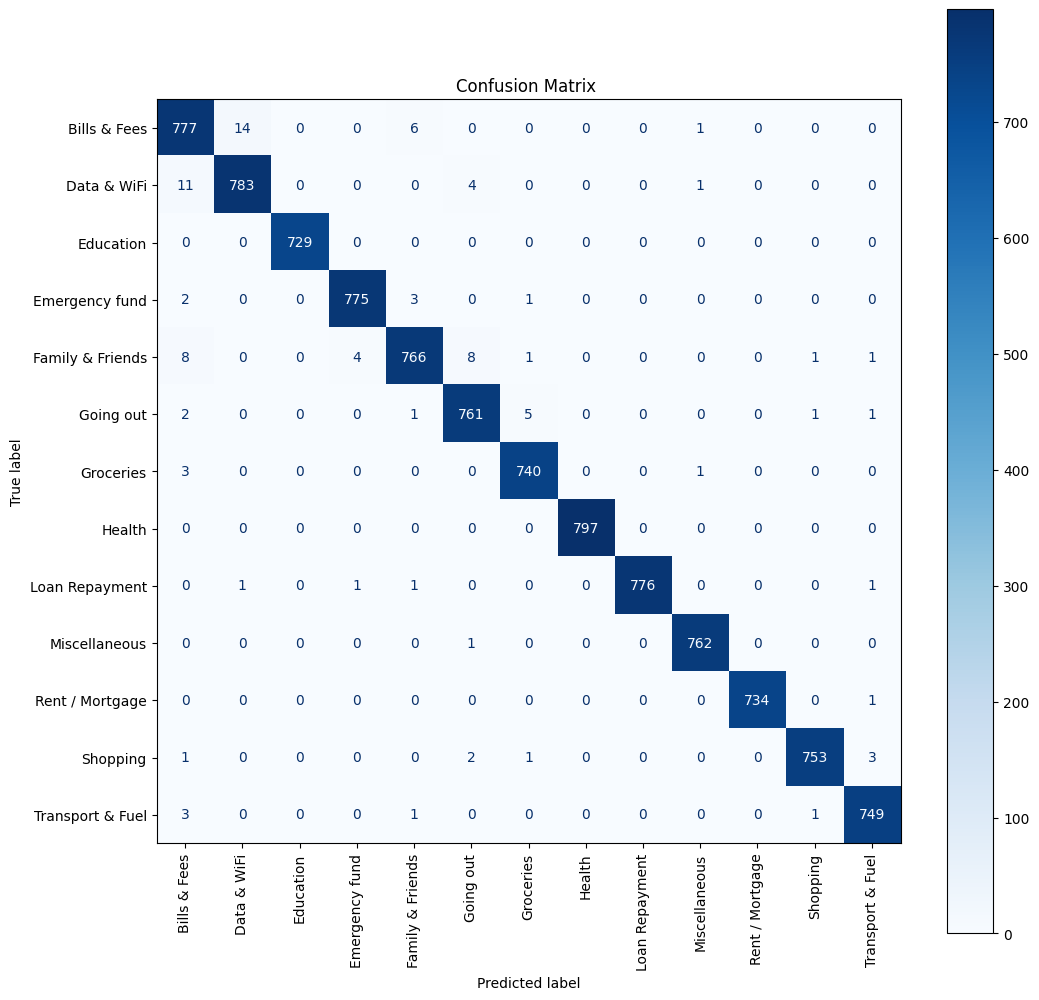

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# We'll use the 'xgb_val_predictions' variable from your previous cell
# If you don't have it, you can re-create it:
# xgb_val_predictions = xgb_model.predict(X_val)

print("XGBoost Error Analysis: Confusion Matrix ")

# Generate the confusion matrix
cm = confusion_matrix(
    y_val, 
    xgb_val_predictions, 
    labels=le.transform(le.classes_)
)

# Plot it using ConfusionMatrixDisplay for a nice, labeled chart
fig, ax = plt.subplots(figsize=(12, 12)) # Make it large enough to read
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=le.classes_
)

disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues')
plt.title("Confusion Matrix ")
plt.show()

### Confusion matrix insights
It reveals that the **model performs with exceptional accuracy**, correctly classifying nearly all transactions. The **dark diagonal** indicates strong alignment between actual and predicted labels, while the **light off-diagonal cells** show minimal confusion.

The model shows **minor, logical misclassifications** in two main areas:

1. **Groceries, Shopping and Miscellaneous** – These categories overlap semantically, leading to confusion when merchant names (like “Carrefour”) don’t clarify the specific item type.
2. **Bills & Fees vs. Data & WiFi** – The shared “Safaricom” keyword causes mix-ups between prepaid and postpaid services.

Overall, the errors are **meaningful rather than random**, mirroring human ambiguity in real spending data. Further improvement would require **more specific text features** or **contextual distinctions** (e.g., “postpaid” vs. “prepaid”).



Feature Importance


C:\Users\nkulo\AppData\Local\Temp\ipykernel_15632\3693501818.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


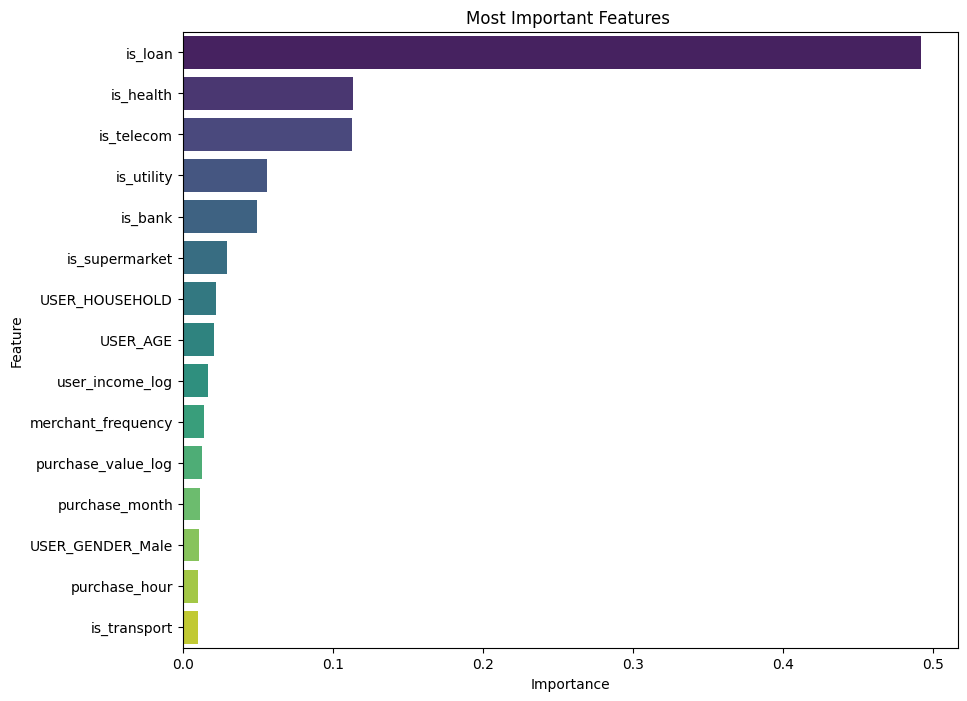

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\nFeature Importance")

# Get feature importances from the trained model
importances = xgb_model.feature_importances_

# Get the names of the features from your final augmented DataFrame
feature_names = X_final_augmented.columns

# Create a DataFrame for easy sorting and plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df.head(15), # Plot just the top 15
    palette='viridis'
)
plt.title('Most Important Features ')
plt.show()

# print("\nTop 15 Features:")
# print(importance_df.head(15))

### Feature importance insights
This plot validates the **success of the feature engineering strategy** and explains why the model performs so well.

The key takeaways are:

1. **Feature engineering drove model accuracy** – Most top predictors are engineered features rather than raw ones, proving that the preprocessing and transformation steps were essential.
2. **Spending context matters most** – Features like `purchase_value_log`, `merchant_frequency`, `purchase_hour`, and `purchase_day_of_week` dominate the chart, showing that *how much* was spent and *when* are the strongest behavioral indicators.
3. **Keyword features are highly effective** – Variables such as `is_bank`, `is_safaricom`, and `is_utility` rank highly, confirming that text-derived signals help the model identify transaction types.
4. **Demographics contribute little** – Original user attributes like `USER_AGE` and `USER_HOUSEHOLD` have low importance, reinforcing that **transaction patterns**, not demographics, drive accurate categorization.

In summary, the plot proves that **data-driven, engineered features**—especially those capturing amount, timing and merchant identity—are the foundation of the model’s strong performance.
